In [2]:
os.chdir('./ProjectData/')

In [3]:
import numpy as np

In [4]:
f = open('./FedRePORTER_PRJ_C_FY2016.csv')
projectLabels = f.next().strip().split(', ')
f.close()

In [5]:
entries = []
f = open('./FedRePORTER_PRJ_C_FY2016.csv')
line = f.next()
for line in f:
    line = line.strip().lstrip('"')
    test = line.split('","')
    if len(test) < 24:
        newline = f.next()
        newline = newline.strip()
        line = line + ' ' + newline
    entries.append(line.split('","'))
f.close()

In [6]:
project2016 = np.array(entries, dtype='str')

In [7]:
for i in entries:
    if len(i) != 24:
        print i
        break

In [8]:
projectLabels

['PROJECT_ID',
 'PROJECT_TERMS',
 'PROJECT_TITLE',
 'DEPARTMENT',
 'AGENCY',
 'IC_CENTER',
 'PROJECT_NUMBER',
 'PROJECT_START_DATE',
 'PROJECT_END_DATE',
 'CONTACT_PI_PROJECT_LEADER',
 'OTHER_PIS',
 'CONGRESSIONAL_DISTRICT',
 'DUNS_NUMBER',
 'ORGANIZATION_NAME',
 'ORGANIZATION_CITY',
 'ORGANIZATION_STATE',
 'ORGANIZATION_ZIP',
 'ORGANIZATION_COUNTRY',
 'BUDGET_START_DATE',
 'BUDGET_END_DATE',
 'CFDA_CODE',
 'FY',
 'FY_TOTAL_COST',
 'FY_TOTAL_COST_SUB_PROJECTS']

In [9]:
projectLabels.index('FY_TOTAL_COST')

22

In [10]:
agencies = set(project2016[:,4])

In [11]:
agencyBudgets = dict()
for i in agencies:
    agencyBudgets[i] = project2016[np.where(project2016[:,4]==i)[0],22]

In [12]:
convertedBudget = dict()
for i in agencyBudgets:
    cost = 0
    missing = 0
    for j in agencyBudgets[i]:
        if len(j) == 0:
            missing += 1
        else:
            cost += int(j)
    convertedBudget[i] = (cost, missing)

In [13]:
agencies = list(agencies)
agencies.sort()

In [14]:
plotData = dict()
totalBudget = sum([i[0] for i in convertedBudget.values()])
plotData['Other'] = 0
for i in convertedBudget:
    if convertedBudget[i][0]/float(totalBudget) < 0.015:
        plotData['Other'] += convertedBudget[i][0]
    else:
        plotData[i] = convertedBudget[i][0]
print plotData

{'NIFA': 685948957, 'ALLCDC': 2163793342, 'NIH': 29222813776, 'Other': 1198224673, 'NSF': 4375801835}


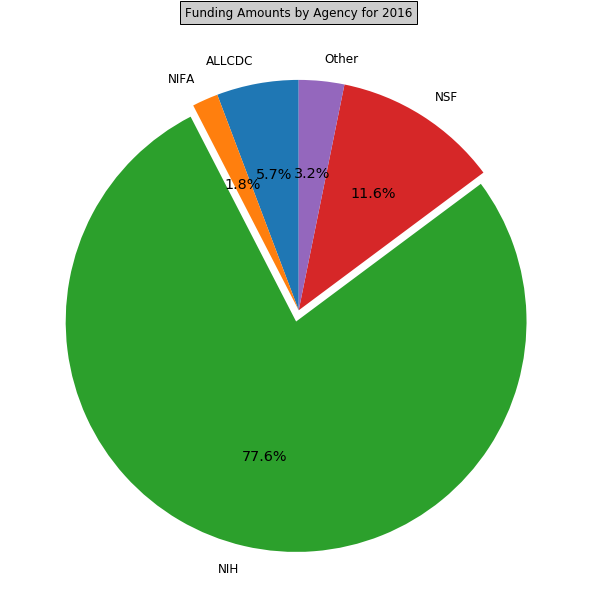

In [17]:
from pylab import *
# make a square figure and axes
figure(1, figsize=(10,10))
ax = axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
labels = plotData.keys()
labels.sort()
fracs = [plotData[i] for i in labels]
explode=[0]*5
explode[2] = 0.05

patches, texts, autotexts = pie(fracs, explode=explode, labels=labels,
                autopct='%1.1f%%', shadow=False, startangle=90)
                # The default startangle is 0, which would start
                # the Frogs slice on the x-axis.  With startangle=90,
                # everything is rotated counter-clockwise by 90 degrees,
                # so the plotting starts on the positive y-axis.
for t in texts:
    t.set_size('large')
for t in autotexts:
    t.set_size('x-large')

title('Funding Amounts by Agency for 2016', bbox={'facecolor':'0.8', 'pad':5})
    
show()